<a href="https://colab.research.google.com/github/Pooja-2709/Bike_demand_prediction/blob/main/Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Name -**
**Bike Sharing Demand Prediction**

**Project Type** - Regression

**Contribution**    - Individual

**Team Member** - Pooja Rathore


# **Project Summary -**

# **GitHub Link -**

# **Problem Statement**
Rental Bike Sharing is a system that allows people to rent bicycles for a specific duration, such as by the hour or week, using different membership options. They have the flexibility to pick up a bike from one location and return it to another when they're finished. This system is being implemented in various cities to enhance transportation and convenience. The goal is to ensure the availability of rental bikes when people require them, minimizing waiting times. A significant challenge is accurately predicting the demand for bikes at different times to maintain a consistent supply.


**Data Overview**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

**Attribute Information**

*   Date : year-month-day

*   Rented Bike count - Count of bikes rented at each hour

*   Hour - Hour of he day

*   Temperature-Temperature in Celsius

*   Humidity - %

*   Windspeed - m/s

*   Visibility - 10m

*   Dew point temperature - Celsius

*   Solar radiation - MJ/m2

*   Rainfall - mm

*   Snowfall - cm

*   Seasons - Winter, Spring, Summer, Autumn

*   Holiday - Holiday/No holiday

*   Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# ***Let's Begin !***

## ***1. Know Your Data***

In [ ]:
# #Connecting to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading


In [ ]:
#import the file from the drive
path = '/content/drive/MyDrive/Colab Notebooks/almabetter project 2/SeoulBikeData.csv'
data = pd.read_csv(path, encoding = "ISO-8859-1")

In [ ]:
df = data.copy()

### Dataset First View


In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count


In [ ]:
#total rows and column present in the dataset
df.shape

(8760, 14)

8760 rows and 14 columns present in our dataset

### Dataset Information

In [ ]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [ ]:
print(f' We have {df.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


#### Missing Values/Null Values

In [ ]:
# Total Missing Values/Null Values
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


There are no missing/null values in dataset


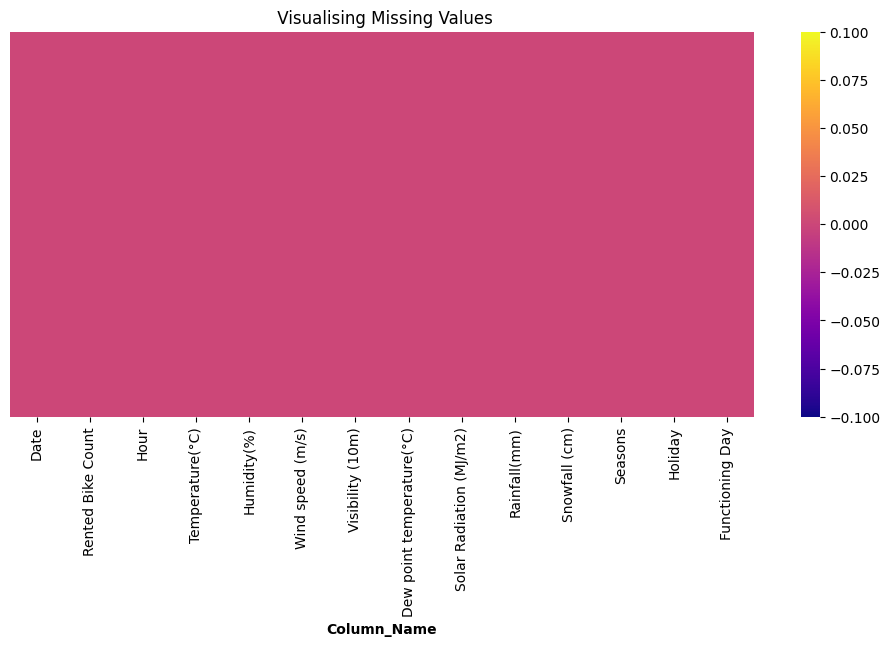

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.xlabel("Column_Name", size=10, weight="bold")
plt.title(" Visualising Missing Values")
plt.show()

#**Information about the dataset**

The dataset provided information about the demand for rental bikes in Seoul, a city in South Korea. It contains data on various weather factors such as temperature, humidity, rainfall, snowfall, and dew point temperature, among others.

There are different factors present in our dataset and we have to analyse how these factors are related to our target variable.


Our objective is to gain insights and make predictions about the number of bikes that should be available on an hourly basis.

The dataset contains 8760 rows and 14 columns.

There are no mising/null and duplicate values in the given dataset.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Check Unique Values for each variable.


In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),"")

No. of unique values in  Date is 365 
No. of unique values in  Rented Bike Count is 2166 
No. of unique values in  Hour is 24 
No. of unique values in  Temperature(°C) is 546 
No. of unique values in  Humidity(%) is 90 
No. of unique values in  Wind speed (m/s) is 65 
No. of unique values in  Visibility (10m) is 1789 
No. of unique values in  Dew point temperature(°C) is 556 
No. of unique values in  Solar Radiation (MJ/m2) is 345 
No. of unique values in  Rainfall(mm) is 61 
No. of unique values in  Snowfall (cm) is 51 
No. of unique values in  Seasons is 4 
No. of unique values in  Holiday is 2 
No. of unique values in  Functioning Day is 2 


## 3. ***Data Wrangling***

### Data Wrangling Code


*   Breaking Date Columns and creating a new column Weekday/Weekend
*   Drop unwanted column which is not required for further processing



In [ ]:
#Convert the date column to datetime format
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
#Extract day, month, year from the 'Date' column
df['Year']= pd.to_datetime(df['Date']).dt.year
df['Month']= pd.to_datetime(df['Date']).dt.month
df['Day']=df['Date'].dt.day_name()
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday


In [ ]:
df['weekdays/weekend']=df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','Day','Year'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64



*    we convert the date column into three new column i.e. "Year", "month", and "weekdays/weekend"
*   From the above graph we can clearly see that the "Year" column have only 2 unique values from december 2017 to november 2018, we can consider this almost one year. we don't need this column so we drop "Year" column
*  From the date column we can create a new column "weekday/weekend". It containd the details about the each day of the month majorly divided into 2 categories i.e. weekdays or weekend.




In [ ]:
df['weekdays/weekend'].value_counts()

0    6216
1    2544
Name: weekdays/weekend, dtype: int64

## Change Data Type

The columns labeled as "Hour," "Month," and "Weekdays/Weekend" currently have integer data types, but they should actually be treated as categorical data. If we don't change their data type, it could lead to incorrect analysis and misleading results when trying to correlate with other variables

In [ ]:
#Change the integer column into categorical column
cols=['Hour','Month','weekdays/weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  Month                      8760 n

## Exploratory Data Analysis

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Analysis of Categorical variable**




Chart - 1

[Text(0.5, 1.0, 'Seasons Vs Rented Bike Count')]

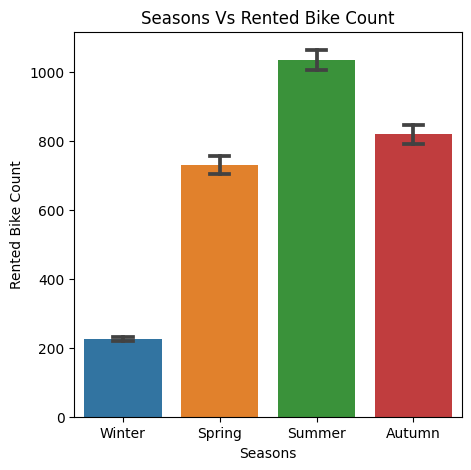

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(x='Seasons',y='Rented Bike Count', data=df, capsize=.2)
ax.set(title='Seasons Vs Rented Bike Count')


Conclusion -

1.   During the summer season Count of Rented Bike is Highest followed by Autmn and Spring seasons.
2.   In winter seasons peoples are less prefer rental bikes as compare to the other seasons



Chart - 2

[Text(0.5, 1.0, 'Month vs Rented Bike Count')]

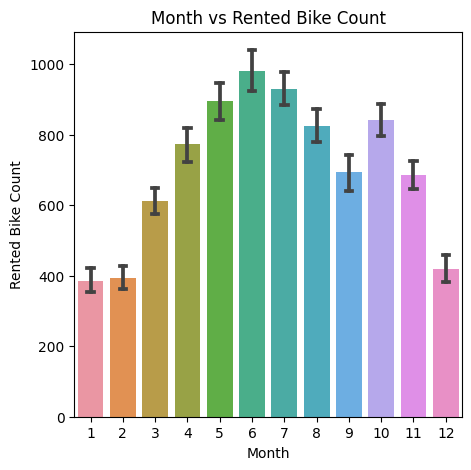

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(x='Month',y='Rented Bike Count',data=df,capsize=.2)
ax.set(title='Month vs Rented Bike Count')

Conclusion -

*   In the month of June having highest number of rented bike count
*   From the month of march Bike rent counting started Increasing



Chart - 3

[Text(0.5, 1.0, 'Holiday vs Rented Bike Count ')]

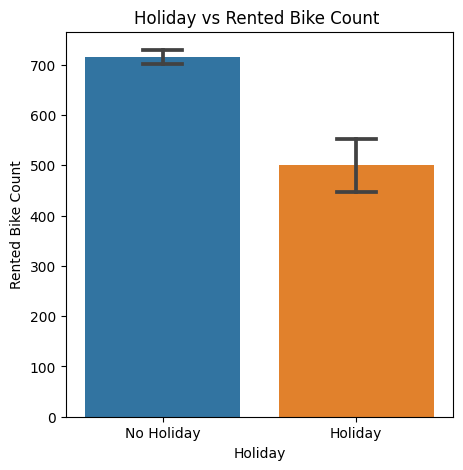

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Holiday vs Rented Bike Count ')

Conclusion -

*   Non Holiday days having higher number of count of rental bike.
*   Approax 700 rented bike count on Non Holiday days



Chart - 4

[Text(0.5, 1.0, 'Functioning Day vs Rented Bike Count ')]

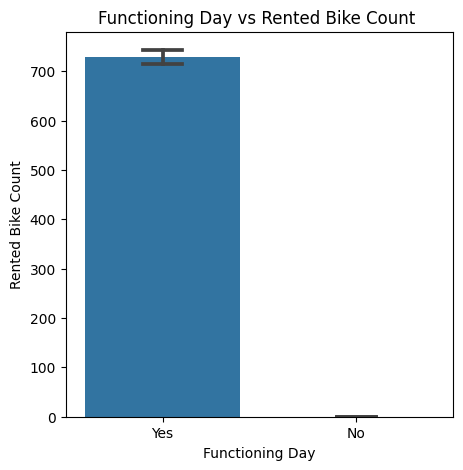

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Functioning Day vs Rented Bike Count ')


Conclusion -

*   Approax 700 bikes are rented on Functioning Day
*   No bikes are rented on No functioning Day



Chart - 5

[Text(0.5, 1.0, '1 :- weekend   0 :- weekdays Vs Rented Bike Count')]

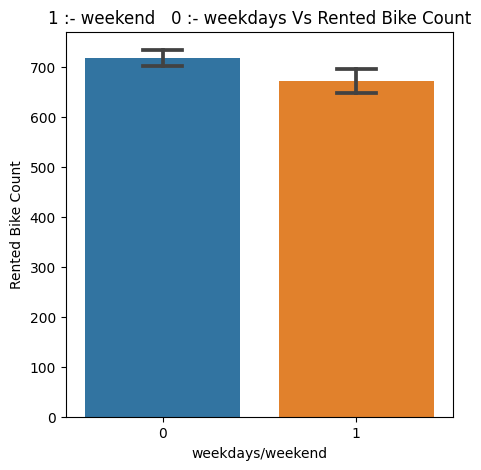

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='weekdays/weekend',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='1 :- weekend   0 :- weekdays Vs Rented Bike Count')

Conclusion -

*   More than 700 bikes were rented on weekdays
*   Approax 650 bikes were rented on weekend



Chart - 6

[Text(0.5, 1.0, 'Hourly basis rented bike count on Holiday categories')]

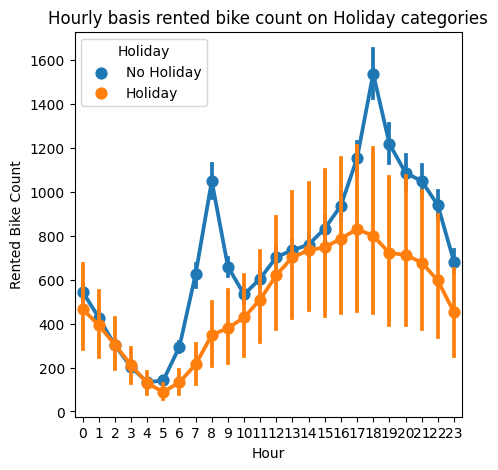

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Hourly basis rented bike count on Holiday categories')

Conclusion -

*   The above grpah shows the average rented bike count at different hours of the day, separated by holidays and non-holidays.
*   This graph shows that hours from 6-10 and 17-19 indicating high demands of rental bikes in case of No Holiday


Chart - 7

[Text(0.5, 1.0, 'Hourly basis rented bike count on Functioning Day')]

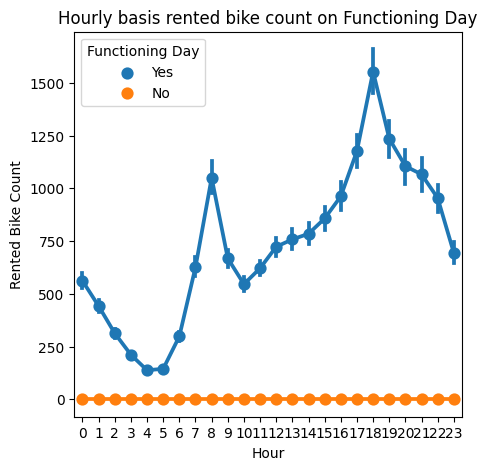

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Hourly basis rented bike count on Functioning Day')

Conclusion -

*   The pattern for the functioning day is similar to the No Holiday
*   In case of non functioning day there were zero rental bikes



Chart - 8

[Text(0.5, 1.0, 'Hourly basis rented bike count on Seasons')]

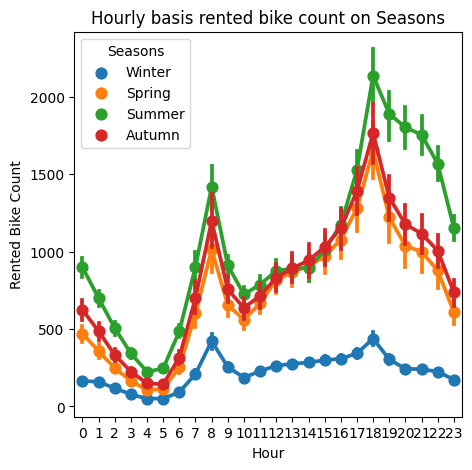

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Hourly basis rented bike count on Seasons')


Conclusion -

*  During the summer season,  there is a significant increase in the usage of rented bikes, with peak demand occurring between 7-9 and 17-19.

*  The usage of rental bikes is very low, during the winter season



Chart - 9

[Text(0.5, 1.0, '1 for sunday/saturday   0 for other day ')]

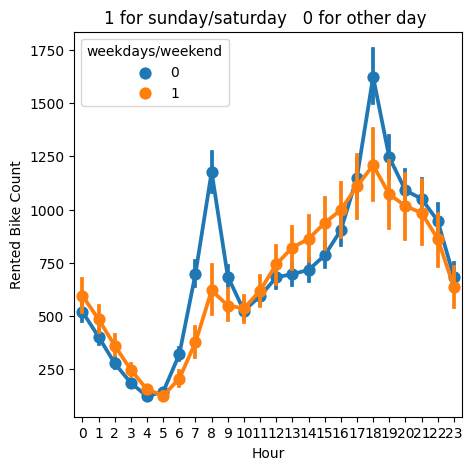

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='weekdays/weekend',ax=ax)
ax.set(title='1 for sunday/saturday   0 for other day ')


Conclusion -

*   From the above graph we can say that there is high demand of rental bike in weekdays between 7-9 and 17-19 which is represented as blue color line
*   Weekend days represented as orange line, During weekend the usage of rental bikes between 0-11 is very low then started increases from 11-17 then again the usage is decreases



## Analyze numerical Variable

In [ ]:
#assign the numerical coulmn to variable
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

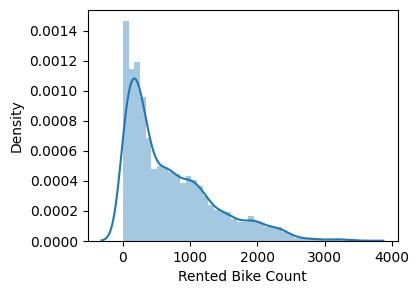

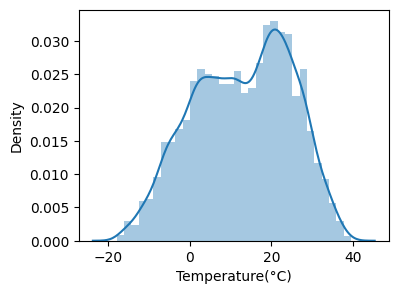

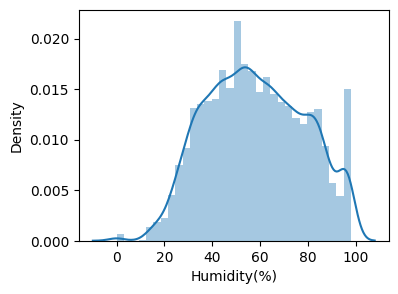

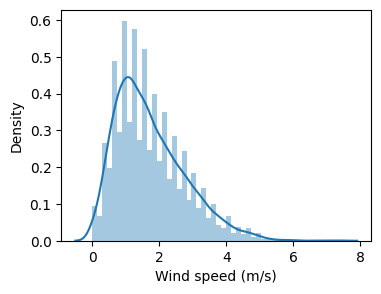

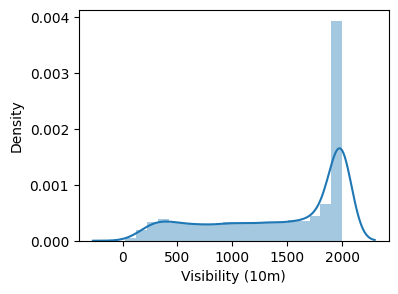

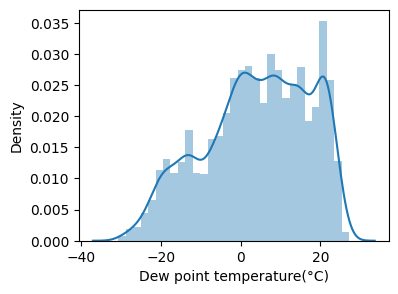

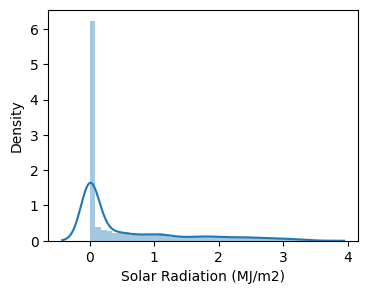

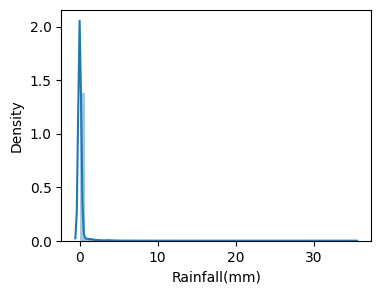

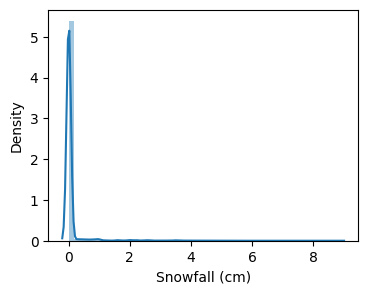

In [ ]:
# it print all displots to check skewness and  the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(4,3))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

Conclusion -

*   People are more likely to ride bike when temperature in between 20-40
*   People more likely to prefer riding bikes when the temperature is around 25°C on average.
*   In case of solar radiations the count of rental bike is rising (apporax 1000)

*  when we have more than 4cm snow, the count of rental bike is very low
*  From the above graph we can see that even in the presence of heavy rainfall, the demand for rented bikes remains high

*   The demand for rented bikes appears to be consistent regardless of wind speed. However, there is an increase in demand when the wind speed reaches 7 m/s, indicating that people enjoy riding bikes when it's slightly windy.






**Checking the relationship**

In [ ]:
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

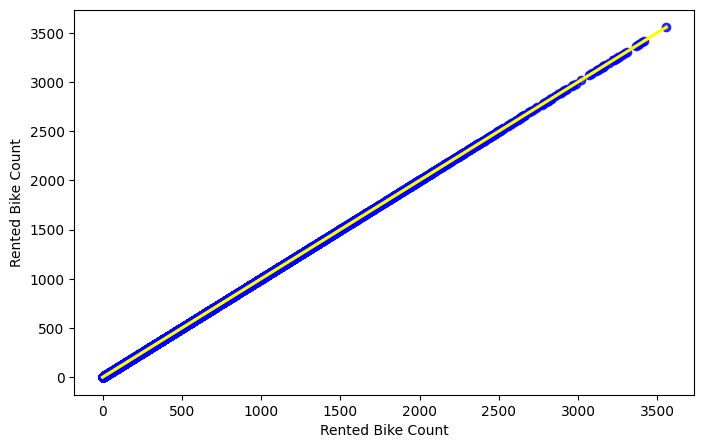

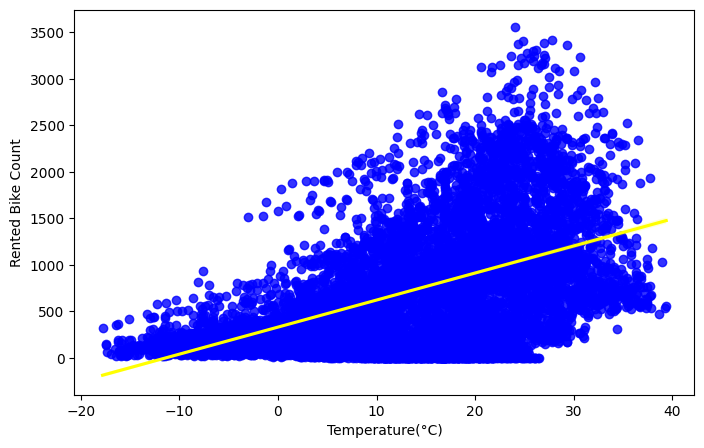

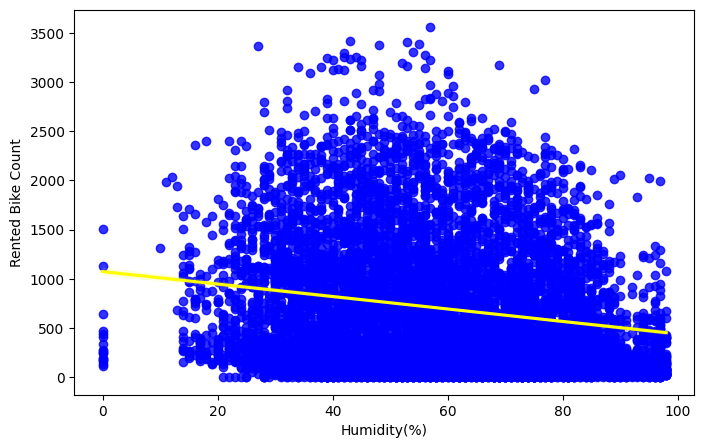

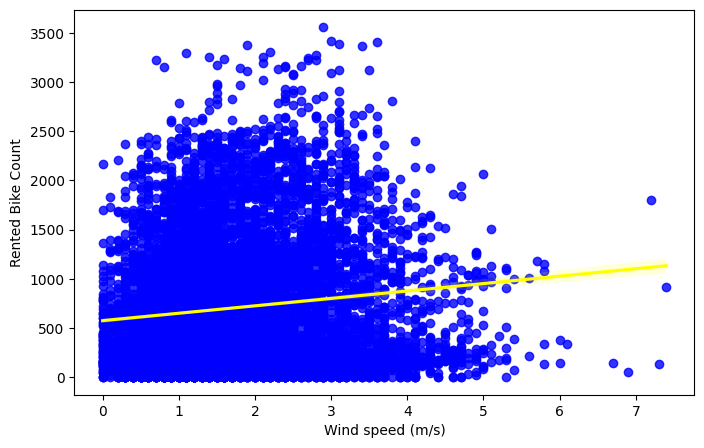

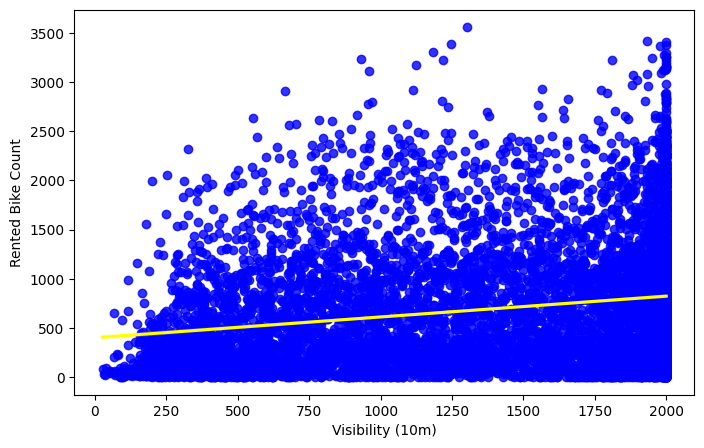

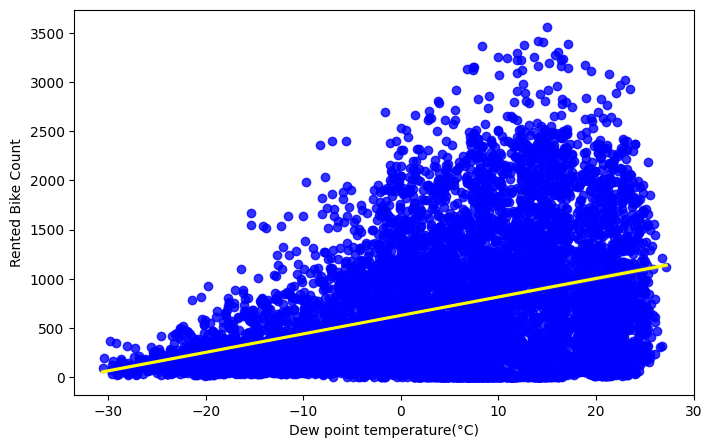

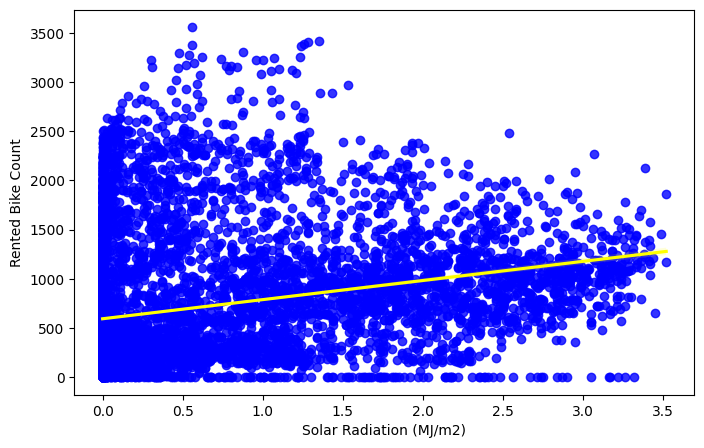

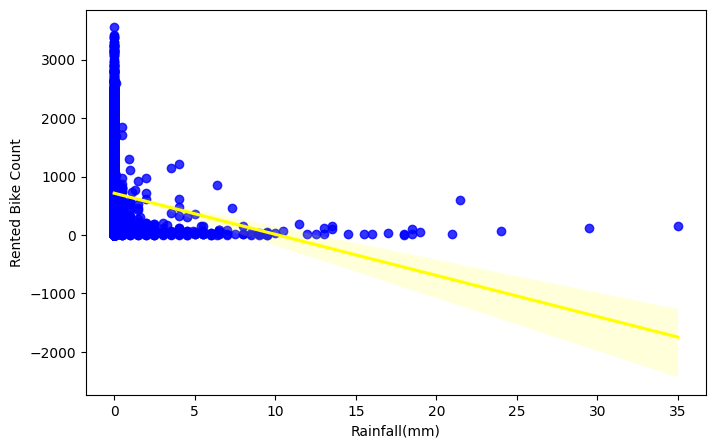

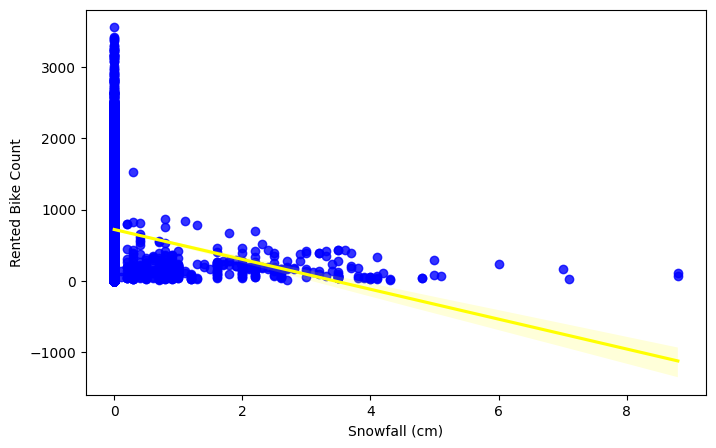

In [ ]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(8,5))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": "blue"}, line_kws={"color": "yellow"})

Conclusion

*   From the above regression plots we can see that the independent variables such as  Temperature, Wind speed, Visibility, Dew point temperature and Solar Radiation are positively related to the dependent variable, which means that with increasing the independent variable the count of rental bike is also increases.
*   Rainfall, Snowfall and Humidity are the features that are negatively related with the dependent variable which means that with increasing the independent variable the count of rental bike decreases



##Normalised Rented Bike Count

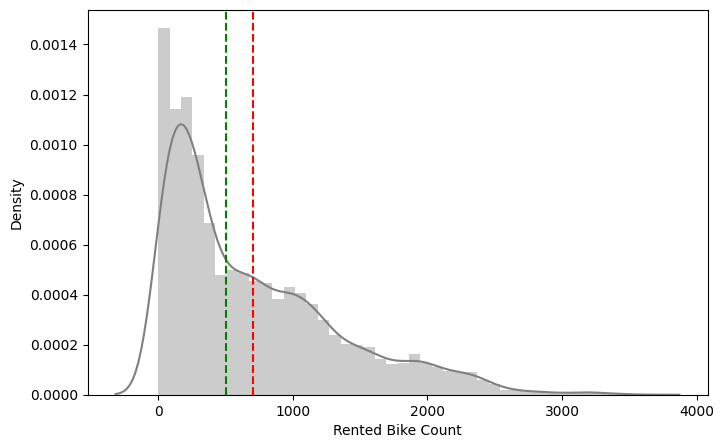

In [ ]:
# Distribution plot of Rented Bike Count
plt.figure(figsize=(8,5))
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="grey")
ax.axvline(df['Rented Bike Count'].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
ax.axvline(df['Rented Bike Count'].median(), color='green', linestyle='dashed', linewidth=1.5, label='Median')
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
plt.show()


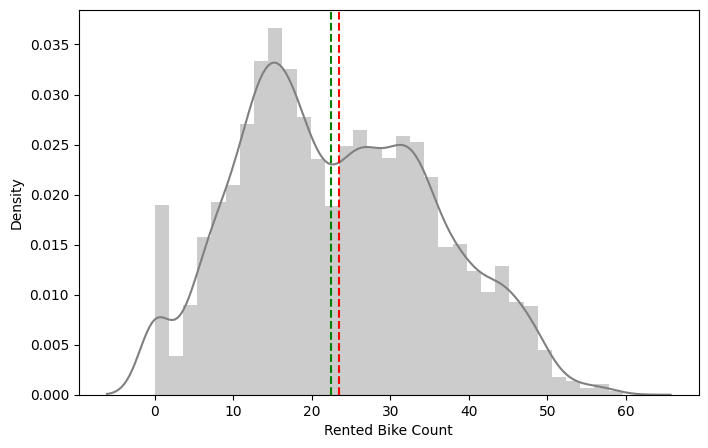

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,5))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="grey")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='red', linestyle='dashed', linewidth=1.5)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='green', linestyle='dashed', linewidth=1.5)

plt.show()

#Handling Outliers

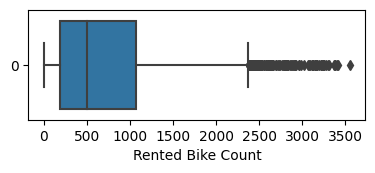

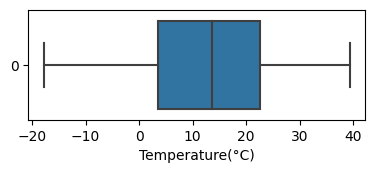

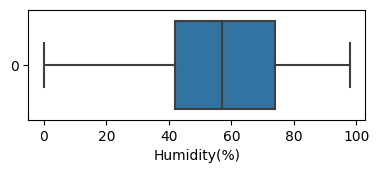

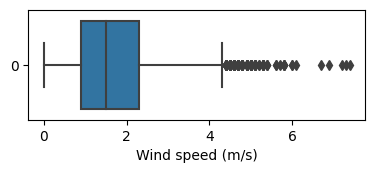

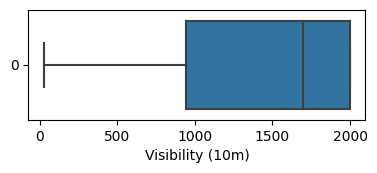

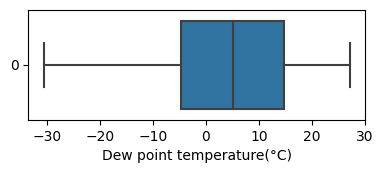

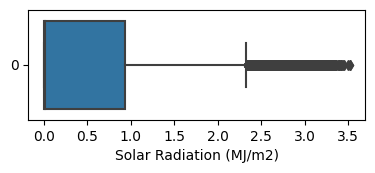

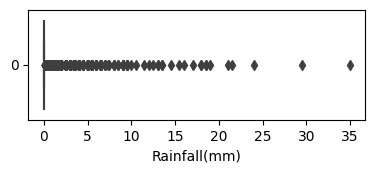

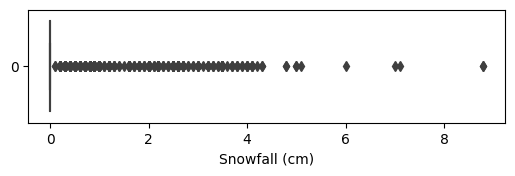

In [ ]:
# looking for outliers of every varable of dataset with the help of boxplot
# import warnings
# warnings.simplefilter(action='ignore',category=FutureWarning)

temp = 1

for col in df.describe().columns:
    plt.figure(figsize = (20, 10))
    plt.subplot(6,4,temp)
    sns.boxplot(df[col],orient='h')
    plt.xlabel(col)
    temp+=1

plt.tight_layout()




*   Rented Bike count contains outliers so we should have to remove this outliers
*   Wind Speed, Solar Radiation, Rainfall, and Snowfall contains outlier values we should keep with it.



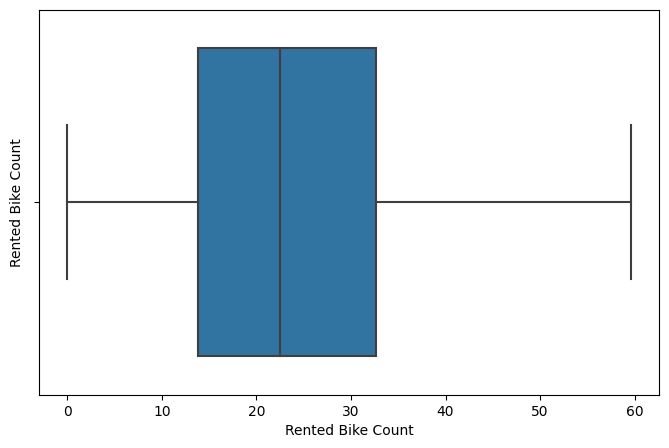

In [ ]:
# After applying square root on Rented Bike Count check whether we still have outliers
plt.figure(figsize=(8,5))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()


##Check Correlation between the variables

In [ ]:
df.corr()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


###Correlation Heatmap

<Axes: >

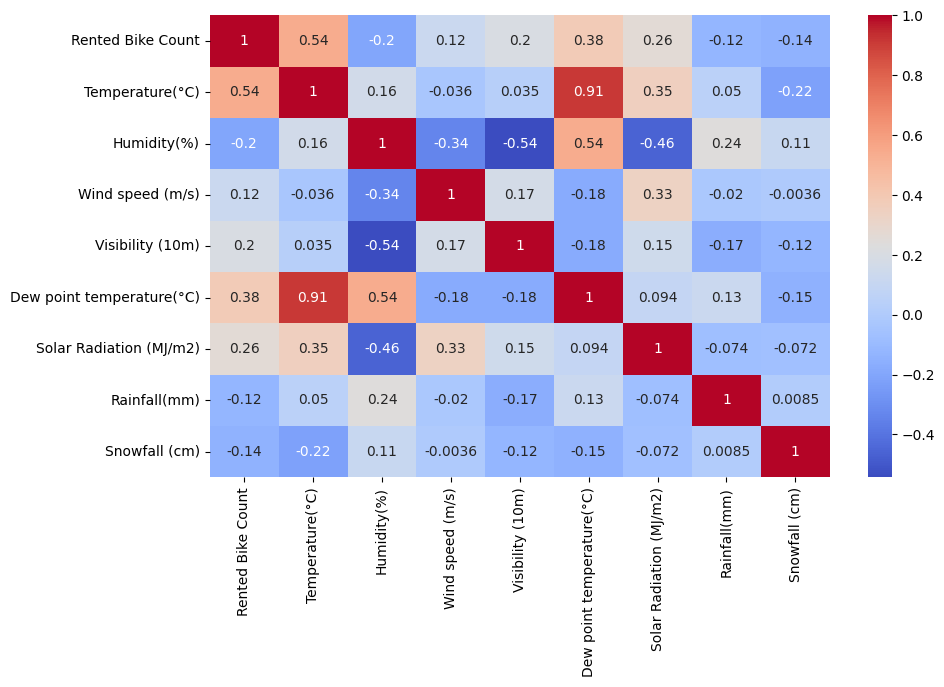

In [ ]:
# Correlation Heatmap visualization code
## plot the Correlation matrix
plt.figure(figsize=(10,6))
correlation=df.corr()
sns.heatmap((correlation), annot=True,cmap='coolwarm')

Conclusion -


*   From the above correlation heatmap graph we can observe that rented bike count is positively correlated with the temperature, Dew point temperature, and Solar radiations
*   Rented bike count is negatively correlated with the Humidity, rainfall, snowfall



From the above graph we can clearly see that the temperature and dew point temperature having very high positive correlation(0.91), so if we drop any one of them does not affect our analysis.
So we can drop the column Dew point temperature(°C)

In [ ]:
#drop the Dew point temperature column
df = df.drop(['Dew point temperature(°C)'],axis=1)

##Multicollinearity

In [ ]:
#  Multicollinearity from variation inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:

# multicollinearity result.

calculate_vif(df[[i for i in df.describe().columns if i not in []]])


,variables,VIF
0,Rented Bike Count,3.428485
1,Temperature(°C),4.415463
2,Humidity(%),4.833669
3,Wind speed (m/s),4.214112
4,Visibility (10m),4.714768
5,Solar Radiation (MJ/m2),2.251838
6,Rainfall(mm),1.095993
7,Snowfall (cm),1.119709


In [ ]:

# multicollinearity result.

calculate_vif(df[[i for i in df.describe().columns if i not in ["Temperature(°C)", "	Dew point temperature(°C)"]]])

,variables,VIF
0,Rented Bike Count,2.458317
1,Humidity(%),3.557047
2,Wind speed (m/s),3.955300
3,Visibility (10m),4.701954
4,Solar Radiation (MJ/m2),1.810801
5,Rainfall(mm),1.087762
6,Snowfall (cm),1.063749


There is no multicollinearity present in the above dataframe, so you can go ahead with it.

#Analyze Categorical Vairable

##One Hot Encoding


A one-hot encoding is a way to represent categorical data more effectively. Machine learning algorithms often can't handle categorical data directly, so we need to convert the categories into integer. This conversion is necessary for both input and output variables that are categorical.

In a dataset, we might have different types of values, including categorical values. To work with these categorical values more efficiently in programming, we create dummy variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  Month                    8760 non-null   category
 13  weekdays/weekend         8760 non-null   category
dtypes: categ

In [ ]:
#Assign all categorical features to single variable
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Month',
       'weekdays/weekend'],
      dtype='object')

In [ ]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays/weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_copy.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'weekdays/weekend_1'],
      dtype='object')

##Train Test split

In [ ]:
#Assign the value in X and Y
X = df_copy.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df_copy['Rented Bike Count'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(6570,)
(2190,)


#**Linear Regression**

In [ ]:
#import library
from sklearn.linear_model import LinearRegression
regressor= LinearRegression().fit(X_train, y_train)

In [ ]:
#check the score
regressor.score(X_train, y_train)

0.7557884266778845

In [ ]:
#check intercept
regressor.intercept_

-2.460945396995296

In [ ]:
#check the coefficeint
regressor.coef_

array([ 4.76592857e-01, -1.37389872e-01, -1.45055135e-01,  5.60074648e-04,
        1.09746012e+00, -1.47539559e+00,  1.91445977e-02, -1.98243149e+00,
       -5.02829279e+00, -7.33272935e+00, -9.57684190e+00, -9.14567640e+00,
       -4.15101144e+00,  2.10516425e+00,  7.21001444e+00,  9.18589247e-01,
       -3.49505813e+00, -3.79366402e+00, -3.07652970e+00, -3.28984917e+00,
       -3.46328474e+00, -2.12611279e+00,  2.63457209e-02,  3.81196406e+00,
        1.02756294e+01,  6.86306739e+00,  6.21187858e+00,  6.33587517e+00,
        5.07654627e+00,  1.45916926e+00, -2.62867121e+00, -3.38160787e+00,
       -6.54244484e+00,  2.95423516e+00,  2.77747454e+01, -8.06203753e-01,
        2.64506479e-01,  3.22771507e-01,  1.45208025e+00,  4.35283784e+00,
       -1.95727651e-01, -7.51151800e-01,  3.32783165e-01,  2.19197225e+00,
        1.08610102e+00,  1.19136471e+00, -7.27039129e-01])

In [ ]:
#get the X_train and X-test value
y_pred_train=regressor.predict(X_train)  #fitted value
y_pred_test=regressor.predict(X_test)  #predicted value

##**Model Evaluation**


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
MSE_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

MAE_train = mean_absolute_error(y_train, y_pred_train)
print(f'MAE= {MAE_train}')

r2_train = r2_score((y_train), (y_pred_train))   # % of explain variance
print(f'R2= {r2_train}')


MSE= 37.60630594639787
RMSE= 6.132398058377968
MAE= 4.658244745512177
R2= 0.7557884266778845


In [ ]:
MSE_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

MAE_test = mean_absolute_error(y_test, y_pred_test)
print(f'MAE= {MAE_test}')

r2_test = r2_score((y_test), (y_pred_test))
print(f'R2= {r2_test}')

MSE= 36.64474647323366
RMSE= 6.053490437196846
MAE= 4.658361507344823
R2= 0.7680218977120629


The score of linear regression(r2 score) is 0.7681 which is near to 1. That means 76% of the accuracy of model performance is good.

Text(0, 0.5, 'Predicted')

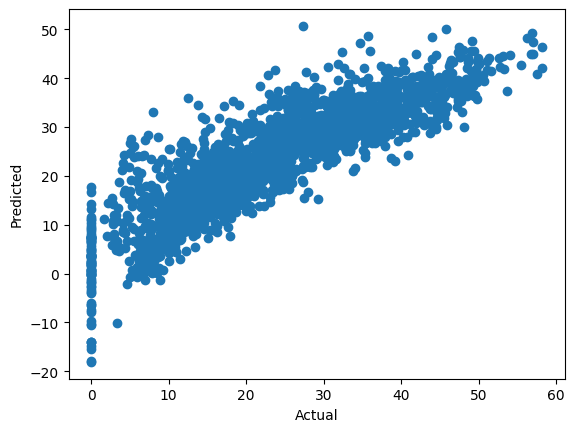

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

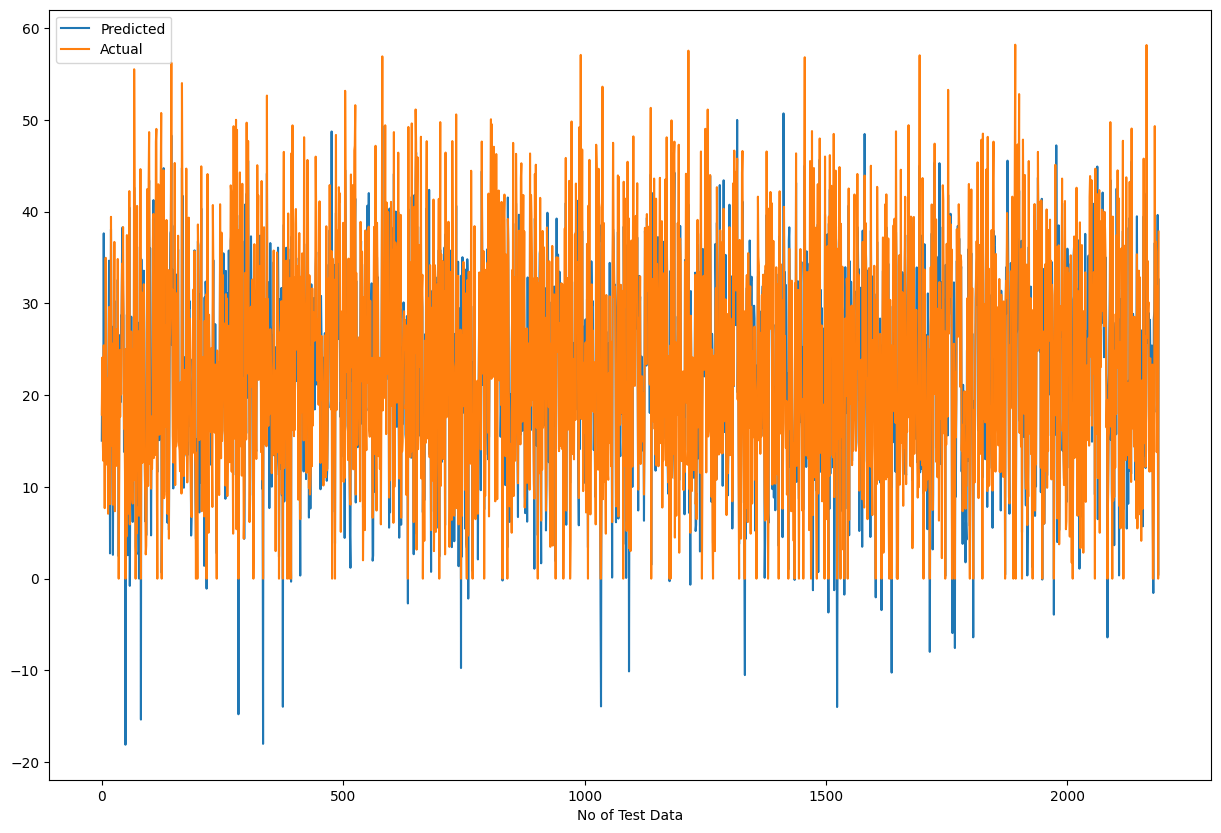

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7680102669229188 0.755778649438424


In [ ]:

#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
#calculate MSE
MSE_lasso= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_lasso)

#calculate RMSE
RMSE_lasso=np.sqrt(MSE_test)
print("RMSE :",RMSE_lasso)


#calculate MAE
MAE_lasso= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso)



#calculate r2
r2_lasso= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_lasso)

MSE : 36.64658374716281
RMSE : 6.053490437196846
MAE : 4.658578791405534
R2 : 0.7680102669229188


##**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.7557883433655243

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#calculate MSE
MSE_ridge= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_ridge)

#calculate RMSE
RMSE_ridge=np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)


#calculate MAE
MAE_ridge= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_ridge)


#import the packages
from sklearn.metrics import r2_score
#calculate r2
r2_ridge= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_ridge)

MSE : 36.646577616668694
RMSE : 6.053641682216473
MAE : 4.658618929538894
R2 : 0.7680103057317668
